In [1]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import torch

## 1. Pre-processing

In [2]:
# loading up the data
data = pd.read_csv('data.csv')
# shape of the data
data.shape

(23028, 10)

In [3]:
# features in the data
data.columns.values

array(['location_name', 'count', 'max temp', 'mean temp', 'min temp',
       'snow on grnd (cm)', 'total precip (mm)', 'total rain (mm)',
       'total snow (cm)', 'date'], dtype=object)

In [4]:
def preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Pre-process a dataframe
    
    :param pd.DataFrame df: raw dataframe from data.csv
    
    :returns pd.DataFrame processed_df: processed dataframe
    ''' 
    group_date_location = df.groupby(['date', 'location_name']).sum()
    group_date = group_date_location.groupby(['date']).sum()
    print("Shape after group by and summation: ", group_date.shape)
    
    group_date['total count'] = ""
    
    for i, ct in enumerate(group_date['count']):
        if ct < 2000:
            group_date['total count'][i] = "less than 2000"
        if ct > 2000 and ct < 10000:
            group_date['total count'][i] = "2000 to 10000"
        if ct > 10000:
            group_date['total count'][i] = "over 10000"
    
    print("New features of total count set!")
    print("Saving file as processed_data.csv...")
    group_date.to_csv('processed_data.csv')
    
    return group_date

In [5]:
processed_df = preprocessing(data)
processed_df.head()

Shape after group by and summation:  (3282, 8)


C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


New features of total count set!
Saving file as processed_data.csv...


,count,max temp,mean temp,min temp,snow on grnd (cm),total precip (mm),total rain (mm),total snow (cm),total count
date,,,,,,,,,
2010-01-01,0,-7.5,-12.3,-17.1,54.0,15.0,0.0,22.8,less than 2000
2010-01-02,0,-23.8,-26.6,-29.2,42.0,3.8,0.0,5.2,less than 2000
2010-01-03,0,-23.4,-34.2,-45.0,63.0,6.0,0.0,9.0,less than 2000
2010-01-04,0,-22.5,-27.0,-31.5,63.0,3.0,0.0,6.0,less than 2000
2010-01-05,0,-10.0,-15.6,-21.2,42.0,2.0,0.0,3.0,less than 2000


## 2. Data engineering

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
def convert_class(df):
    dframe = df.copy()
    
    dframe['class'] = None
                
    for i, cla in enumerate(dframe['total count']):
        if cla == "less than 2000":
            dframe['class'][i] = 0
            
        if cla == "2000 to 10000":
            dframe['class'][i] = 1
            
        if cla == "over 10000":
            dframe['class'][i] = 2
            
    dframe = dframe.drop(columns = ['total count', 'count'])
    return dframe


def scale_values(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values)
    return scaled_data

In [8]:
def data_engineering(processed_df: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    '''
    Perform data engineering on processed dataframe

    :param pd.DataFrame processed_df: output of preprocess()

    :returns pd.DataFrame train_df: training set of the engineered dataframe
    :returns pd.DataFrame test_df: test set of the engineered dataframe
    '''
    train, test = train_test_split(processed_df, test_size = 0.2, random_state = 123)
    print("Saving train data to train.csv")
    print("Saving test data to test.csv")
    train.to_csv("train.csv")
    test.to_csv("test.csv")
    
    # convert labels to class values
    train_class = convert_class(train)
    test_class = convert_class(test)
    print("Labeling complete!")

    # scale the datasets - normalization
    train_scale = scale_values(train_class.iloc[:, :-1])
    test_scale = scale_values(test_class.iloc[:, :-1])
    print("Scaling complete!")
    
    train_df = (train_scale, train_class['class'].values)
    test_df = (test_scale, test_class['class'].values)
    
    return (train_df, test_df)

In [9]:
train_df, test_df = data_engineering(processed_df)

Saving train data to train.csv
Saving test data to test.csv


C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Labeling complete!
Scaling complete!


##  3. Classical machine learning methods

In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
def classical_ml(train_df: pd.DataFrame, test_df: pd.DataFrame) -> ('classifier', 'accuracy', 'confusion matrix'):
    '''
    Use classical machine learning methods to predict total counts

    :param pd.DataFrame train_df: training set dataframe
    :param pd.DataFrame test_df: test set dataframe

    :returns 'classifier': trained classifier
    :returns 'accuracy': tuple of training accuracy and testing accuracy
    :returns 'confusion matrix': confusion matrix on test set
    '''
    
    x_train, y_train = train_df[0], train_df[1].astype('int')
    x_test, y_test = test_df[0], test_df[1].astype('int')
    
    # creating a classifier, using the support vector classifier
    clf = svm.SVC()
    clf.fit(x_train, y_train)
    print("Training complete!")
    
    # test accuracy
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of the trained model is: {}%".format(round(acc, 5)*100))
    
    # building the confusion matrix
    conf = confusion_matrix(y_test, y_pred)
    print("Final confusion matrix is: ")
    print(conf)
    
    return clf, acc, conf

In [12]:
classifier, accuracy, confusion_mat = classical_ml(train_df, test_df)

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training complete!
Accuracy of the trained model is: 76.408%
Final confusion matrix is: 
[[249   8   1]
 [ 73 130  31]
 [  1  41 123]]


## 4. Neural networks

In [13]:
import torch
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [53]:
train_loss, valid_loss, test_loss = [], [], []

def nn_ml(train_df: pd.DataFrame, test: pd.DataFrame) ->  ('model', 'test_accuracy'):
    '''
    Use neural networks to predict total counts

    :param pd.DataFrame train_df: training set dataframe
    :param pd.DataFrame test_df: test set dataframe

    :returns 'model': trained model
    :returns 'test_accuracy': accuracy on test set
    '''
    
    onehot_enc = OneHotEncoder()
    train_df_onehot = onehot_enc.fit_transform(train_df[1].astype('int').reshape(-1, 1)).toarray()

    x_train, x_valid, y_train, y_valid = train_test_split(train_df[0], train_df_onehot, test_size=0.35)
    x_tra = torch.tensor(x_train, dtype=torch.float)
    y_tra = torch.tensor(y_train, dtype=torch.float)

    x_val = torch.tensor(x_valid, dtype=torch.float)
    y_val = torch.tensor(y_valid, dtype=torch.float)
    
    # use the nn package to define our model and loss function.
    model = torch.nn.Sequential(
    torch.nn.Linear(x_tra.shape[1], 25),
    torch.nn.ReLU(),
    torch.nn.Linear(25, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, y_tra.shape[1]),
    torch.nn.Sigmoid(),)
    
    print("Model Architecture: ")
    print(model)
    
    epochs = 100
    stop_counter = 0
    early_stop = 5
    learning_rate = 1e-4
    every = 10
    threshold = 15.0

    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    onehot_enc = OneHotEncoder()
    train_df_onehot = onehot_enc.fit_transform(train_df[1].astype('int').reshape(-1, 1)).toarray()

    x_train, x_valid, y_train, y_valid = train_test_split(train_df[0], train_df_onehot, test_size=0.2)
    x_tra = torch.tensor(x_train, dtype=torch.float)
    y_tra = torch.tensor(y_train, dtype=torch.float)

    x_val = torch.tensor(x_valid, dtype=torch.float)
    y_val = torch.tensor(y_valid, dtype=torch.float)

    train_sum_loss, valid_sum_loss, test_sum_loss = 0, 0, 0

    for t in range(1, epochs + 1):
        train_score, valid_score = 0, 0
        train_sum_loss, valid_sum_loss = 0, 0

        #####set the model to train mode based on the train data
        model.train()
        for i, vec in enumerate(x_tra):
            # forward pass
            y_train_pred = model(vec)
            # compute and print loss
            loss = loss_fn(y_train_pred, y_tra[i])
            # collect the loss
            train_sum_loss += loss.item()
            # zero the gradient before back prop
            optimizer.zero_grad()
            # backward pass
            loss.backward()
            # optimizer makes an update to its parameters
            optimizer.step()

        
        #####set the model to evaluate mode based on the validation data
        model.eval()
        for i, vec in enumerate(x_val):
            # forward pass
            y_valid_pred = model(vec)
            # compute and print loss
            loss = loss_fn(y_valid_pred, y_val[i])
            valid_sum_loss += loss.item()

        train_loss.append(train_sum_loss / x_tra.shape[0])
        valid_loss.append(valid_sum_loss / x_val.shape[0])
        
        train_score = round((train_sum_loss / x_tra.shape[0]) * 100, 3)
        valid_score = round((valid_sum_loss / x_val.shape[0]) * 100, 3)

        #if t % every == 0:
        print("Epoch ", t, (t / epochs) * 100, "% complete...")
        print("Train loss: ", train_score, "Validation score: ", valid_score)
        print("\n")

        if valid_score < threshold:
            stop_counter += 1

            if stop_counter == early_stop:
                print("Threshold reached after ", t, " iterations!")
                print("Training Complete after Early Stop!")
                break
                
    
    #####testing the model after training and validataion
    test_df_onehot = onehot_enc.fit_transform(test[1].astype('int').reshape(-1, 1)).toarray()
    
    x_test = torch.tensor(test[0], dtype=torch.float)
    y_test = torch.tensor(test_df_onehot, dtype=torch.float)
    
    model.eval()
    for i, vec in enumerate(x_test):
        # forward pass with test dataset
        y_test_pred = model(vec)
        # compute and print loss
        loss = loss_fn(y_test_pred, y_test[i])
        test_loss.append(loss.item())
        test_sum_loss += loss.item()
    
    test_avg_loss = (test_sum_loss / y_test.shape[0]) * 100
    test_acc = 100 - test_avg_loss
    #print("Total test loss: ", test_sum_loss)
    print("Total average test loss: ", round(test_avg_loss, 4), "%")
    print("Total average test accuracy: ", round(test_acc, 4), "%")

    return model, test_acc

In [54]:
nn, acc = nn_ml(train_df, test_df)

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Model Architecture: 
Sequential(
  (0): Linear(in_features=7, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=3, bias=True)
  (5): Sigmoid()
)


C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Epoch  1 0.01 % complete...
Train loss:  24.013 Validation score:  22.478


Epoch  2 0.02 % complete...
Train loss:  21.914 Validation score:  21.737


Epoch  3 0.03 % complete...
Train loss:  21.531 Validation score:  21.4


Epoch  4 0.04 % complete...
Train loss:  21.133 Validation score:  20.869


Epoch  5 0.05 % complete...
Train loss:  20.535 Validation score:  20.117


Epoch  6 0.06 % complete...
Train loss:  19.736 Validation score:  19.175


Epoch  7 0.06999999999999999 % complete...
Train loss:  18.783 Validation score:  18.128


Epoch  8 0.08 % complete...
Train loss:  17.773 Validation score:  17.104


Epoch  9 0.09 % complete...
Train loss:  16.832 Validation score:  16.227


Epoch  10 0.1 % complete...
Train loss:  16.048 Validation score:  15.535


Epoch  11 0.11 % complete...
Train loss:  15.431 Validation score:  15.01


Epoch  12 0.12 % complete...
Train loss:  14.96 Validation score:  14.616


Epoch  13 0.13 % complete...
Train loss:  14.602 Validation score:  14.32



C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Total average test loss:  13.2321 %
Total average test accuracy:  86.7679 %


In [57]:
import matplotlib.pyplot as plt

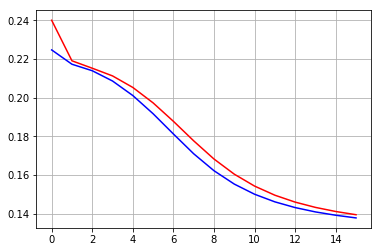

In [58]:
plt.grid()
plt.plot(np.arange(len(train_loss)), train_loss, 'r-')
plt.plot(np.arange(len(valid_loss)), valid_loss, 'b-')
#plt.plot(np.arange(len(test_loss)), test_loss, 'g-')
plt.show()

In [68]:
nn.eval()
x_test = torch.tensor(test_df[0], dtype=torch.float)
onehot_enc = OneHotEncoder()
test_df_onehot = onehot_enc.fit_transform(test_df[1].astype('int').reshape(-1, 1)).toarray()
y_test = torch.tensor(test_df_onehot, dtype=torch.float)
am = nn(x_test[0])
am, y_test[0]

C:\Users\sunny\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(tensor([0.1065, 0.4168, 0.4416], grad_fn=<SigmoidBackward>),
 tensor([0., 0., 1.]))